In [79]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
x = torch.arange(0,10,0.1).unsqueeze(1)
weight, bias = 0.3, 0.9

y = weight*x+bias

In [81]:
split = 0.8
x_train, x_test = x[:int(len(x)*split)], x[int(len(x)*split):]
y_train, y_test = y[:int(len(x)*split)], y[int(len(x)*split):]

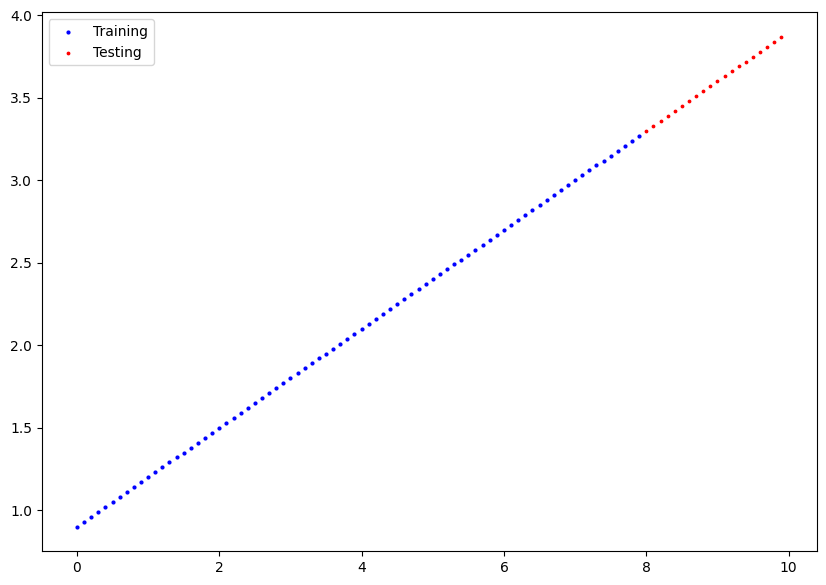

In [82]:
plt.figure(figsize=(10,7))

plt.scatter(x_train, y_train, c='b', s=4, label="Training")
plt.scatter(x_test, y_test, c='r', s=3, label="Testing")
plt.legend()

In [83]:
class lin_reg(nn.Module):

    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1), requires_grad=True)

    def forward(self, x:torch.Tensor):
        return self.weight*x+self.bias

In [84]:
model_0 = lin_reg()
model_0.state_dict()

OrderedDict([('weight', tensor([0.4837])), ('bias', tensor([1.0553]))])

In [85]:
loss_function = nn.L1Loss()
opt = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [86]:
epochs = 10000
for epoch in range(epochs):
    model_0.train()

    y_pred = model_0(x_train)
    loss = loss_function(y_pred,y_train)
    opt.zero_grad()

    loss.backward()
    opt.step()

    model_0.eval()

    if epoch % 20 == 0:
        with torch.inference_mode():
            y_pred_test = model_0(x_test)

            loss_test = loss_function(y_pred_test, y_test)
        print(f"Epoch: {epoch}| Loss(Training): {loss}| Loss(Testing): {loss_test}")

Epoch: 0| Loss(Training): 0.8809264898300171| Loss(Testing): 1.4359235763549805
Epoch: 20| Loss(Training): 0.09946675598621368| Loss(Testing): 0.050643038004636765
Epoch: 40| Loss(Training): 0.1399696171283722| Loss(Testing): 0.0035028934944421053
Epoch: 60| Loss(Training): 0.11231084167957306| Loss(Testing): 0.08636464923620224
Epoch: 80| Loss(Training): 0.12772485613822937| Loss(Testing): 0.0659528523683548
Epoch: 100| Loss(Training): 0.132144495844841| Loss(Testing): 0.061084307730197906
Epoch: 120| Loss(Training): 0.13458696007728577| Loss(Testing): 0.05883435159921646
Epoch: 140| Loss(Training): 0.13458696007728577| Loss(Testing): 0.05883435159921646
Epoch: 160| Loss(Training): 0.13458696007728577| Loss(Testing): 0.05883435159921646
Epoch: 180| Loss(Training): 0.13458696007728577| Loss(Testing): 0.05883435159921646
Epoch: 200| Loss(Training): 0.13458696007728577| Loss(Testing): 0.05883435159921646
Epoch: 220| Loss(Training): 0.13458696007728577| Loss(Testing): 0.05883435159921646


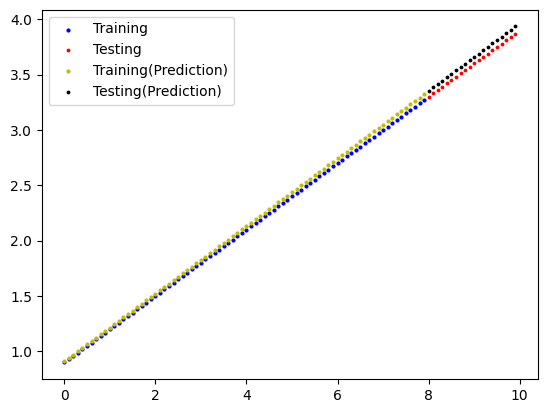

In [87]:
plt.scatter(x_train, y_train, c='b', s=4, label="Training")
plt.scatter(x_test, y_test, c='r', s=3, label="Testing")
plt.scatter(x_train, y_pred.detach().numpy(), c='y', s=4, label="Training(Prediction)")
plt.scatter(x_test, y_pred_test.detach().numpy(), c='black', s=3, label="Testing(Prediction)")
plt.legend()

In [88]:
y_pred.detach().numpy().shape, x_train.shape

((80, 1), torch.Size([80, 1]))